## Positive Degree Days

[Calov and Greeve (2005)](https://www.cambridge.org/core/journals/journal-of-glaciology/article/semianalytical-solution-for-the-positive-degreeday-model-with-stochastic-temperature-variations/6FD568E1D92AA7B21C25E34B012790E1): 
$$
PDD = \int\limits_{0}^{A} \left[ 
\frac{\sigma}{\sqrt{2\pi}} 
\exp \left(  -\frac{T_{\rm ac}(t)^2}{2\sigma^2}\right) 
+ \frac{T_{\rm ac}(t)}{2}  \rm{erfc}  \left( -\frac{T_{\rm ac}(t)}{\sqrt{2}\sigma} \right)
 \right] \rm{d} t
$$

In [1]:
import sys
import numpy as np 
import scipy.special as sp
import matplotlib.pyplot as plt 

sys.path.append('../../src/thermal')

from utils import * 

def classic_PDDs(T, T_m=0.0): 
    return np.greater(T, T_m) * T

def clavo_greev_PDDs(T, σ=0.0): 
    import scipy.special as sp

    with np.errstate(divide='ignore', invalid='ignore'):
        T_norm = T / (np.sqrt(2)*σ) 
        
    clavo_greev = σ / np.sqrt(2*np.pi) * np.exp(-T_norm**2) + T/2*sp.erfc(-T_norm)
    
    return clavo_greev

In [2]:
# default air temperature parameters from KMR data
temp_params = dict(α       = 10.8, 
                   dTdz    = 6.5E-3, 
                   z_ref   = 2193.0, 
                   T_mean  = -6.02, 
                   T_peak  = 196, 
                   T_σ     = ( 8.29376332e-05, -3.45256005e-02, 6.31076200e+00))

# initialize the AirTemp class with the default parameters
AirTemp  = surface_AirTemp(**temp_params)

In [3]:
doy  = np.arange(0,365)
Z    = np.linspace(2000,3000)
std  = np.polyval(temp_params['T_σ'], doy)[:,None]

# temp = AirTemp(Z, T_σ=0.0)
temp = AirTemp(Z)

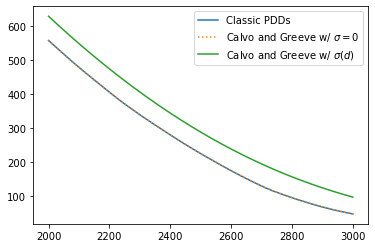

In [4]:
fig, ax = plt.subplots()

ax.plot(Z, classic_PDDs(temp).sum(0), 
       label='Classic PDDs')

ax.plot(Z, clavo_greev_PDDs(temp, σ=0.0).sum(0), 
       label=r'Calvo and Greeve w/ $\sigma=0$', 
       ls = ':')

ax.plot(Z, clavo_greev_PDDs(temp, σ=std).sum(0), 
       label=r'Calvo and Greeve w/ $\sigma(d)$')

ax.legend()

Text(0, 0.5, 'Mean Air Temperature [$^\\circ$ C]')

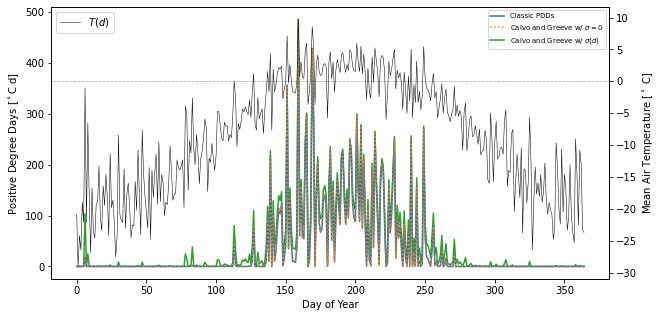

In [5]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(doy, classic_PDDs(temp).sum(1), 
       label='Classic PDDs')
ax.plot(doy, clavo_greev_PDDs(temp, σ=0.0).sum(1), 
       label=r'Calvo and Greeve w/ $\sigma=0$', 
       ls = ':')
ax.plot(doy, clavo_greev_PDDs(temp, σ=std).sum(1), 
       label=r'Calvo and Greeve w/ $\sigma(d)$', 
       zorder=0)

ax.legend(fontsize='x-small')


ax2 = ax.twinx()

ax2.plot(doy, temp.mean(1), 
         label='$T(d)$', c='k', lw=0.5)

ax2.axhline(0.0, ls=':', c='k', lw=0.5)

ax2.legend(loc=2)



ax.set_xlabel('Day of Year')
ax.set_ylabel('Positive Degree Days [$^\circ$C d]')
ax2.set_ylabel('Mean Air Temperature [$^\circ$ C]')

In [6]:
print(classic_PDDs(temp).sum())
print(clavo_greev_PDDs(temp).sum())
print(clavo_greev_PDDs(temp, σ=std).sum())

12486.232331081896
12486.232331081896
15680.579406617167


In [19]:
doy  = np.arange(0,365)
Z    = np.linspace(2000,3000)
std  = np.polyval(temp_params['T_σ'], doy)[:,None]

# initialize the AirTemp class with the default parameters
AirTemp  = surface_AirTemp(**temp_params)
temp = AirTemp(Z, T_σ=0.0)

Text(0, 0.5, 'Mean Air Temperature [$^\\circ$ C]')

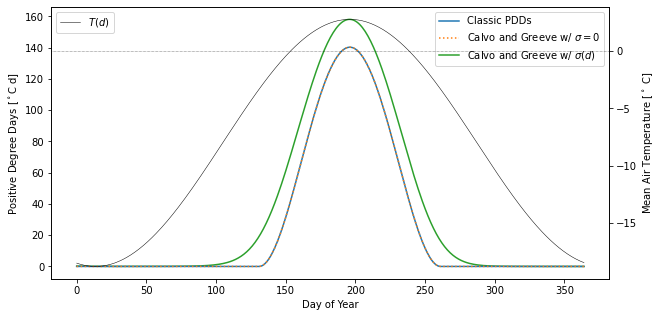

In [20]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(doy, classic_PDDs(temp).sum(1), 
       label='Classic PDDs')
ax.plot(doy, clavo_greev_PDDs(temp, σ=0.0).sum(1), 
       label=r'Calvo and Greeve w/ $\sigma=0$', 
       ls = ':')
ax.plot(doy, clavo_greev_PDDs(temp, σ=std).sum(1), 
       label=r'Calvo and Greeve w/ $\sigma(d)$', 
       zorder=0)

ax.legend( facecolor='w')


ax2 = ax.twinx()

ax2.plot(doy, temp.mean(1), 
         label='$T(d)$', c='k', lw=0.5)

ax2.axhline(0.0, ls=':', c='k', lw=0.5)

ax2.legend(loc=2)



ax.set_xlabel('Day of Year')
ax.set_ylabel('Positive Degree Days [$^\circ$C d]')
ax2.set_ylabel('Mean Air Temperature [$^\circ$ C]')

In [21]:
print(classic_PDDs(temp).sum())
print(clavo_greev_PDDs(temp).sum())
print(clavo_greev_PDDs(temp, σ=std).sum())

9440.415163558688
9440.415163558688
12890.020586330034


In [42]:
def clavo_greev_PDDs(T, σ=0.0): 
    import scipy.special as sp

    with np.errstate(divide='ignore', invalid='ignore'):
        T_norm = T / (np.sqrt(2)*σ) 
        
    # clavo_greev = σ / np.sqrt(2*np.pi) * np.exp(-T_norm**2) + T/2*sp.erfc(-T_norm)
    clavo_greev = T_norm
    return clavo_greev

### KMR 3-Hour Model Data

In [ ]:
dat = np.load('/Users/andrewnolan/Desktop/annual_3hourly_T.npy')

In [ ]:
plt.plot(np.greater(dat.mean(0),0) * dat.mean(0) * 3/24)

In [ ]:
np.datetime_data

In [ ]:
dt_3h = np.dtype('timedelta64[3h]')

np.array(np.arange(dat.shape[1]),  dtype=dt_3h)

In [ ]:
dat.shape[1]